# تمرین سوم: کاهش نویز (قسمت دوم)
پیش از اعمال فیلترهای خواسته شده در قسمت قبل تصویر را با استفاده از یک تابع لگاریتمی نگاشت داده و سپس فیلتر
نمایید. بعد از اعمال فیلتر مکانی با استفاده از معکوس تابع لگاریتمی تصویر را بازسازی نموده و اثر اعمال تابع لگاریتمی را در
کاهش نویز بررسی نمایید.

### Import libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.morphology import disk
from skimage.filters import median

CONSTANT = 255 / np.log(1 + 255)

### Define log transform function

In [2]:
def log_transform(img):
    if img.dtype != np.uint8:
        img *= 255
        img = img.astype(np.uint8)
    # CONSTANT = 255 / np.log(1 + np.max(img))
    return (CONSTANT * np.log(img + 1)).astype(np.uint8)

### Define exponential transform function

In [3]:
def inverse_log_transformation(img):
    if img.dtype != np.uint8:
        img *= 255
        img = img.astype(np.uint8)
    return (np.exp(img / CONSTANT) - 1).astype(np.uint8)

### Reading images

In [4]:
camera_man = cv2.imread("cameraman.tif", cv2.IMREAD_GRAYSCALE)
babon = cv2.imread("mandril.tiff", cv2.IMREAD_GRAYSCALE)

### Adding noise to images

In [5]:
sigma = 0.1
salty_camera_man = random_noise(camera_man, mode='s&p', amount=sigma)
salty_babon = random_noise(babon, mode='s&p', amount=sigma)

gaussian_camera_man = random_noise(camera_man, mode='gaussian', var=sigma ** 2, mean=0)
gaussian_babon = random_noise(babon, mode='gaussian', var=sigma ** 2, mean=0)

### Applying log transform to noisy images

In [6]:
log_salty_camera_man = log_transform(salty_camera_man)
log_salty_babon = log_transform(salty_babon)
log_gaussian_camera_man = log_transform(gaussian_camera_man)
log_gaussian_babon = log_transform(gaussian_babon)

<ipython-input-2-5ef816ba6a52>:6: RuntimeWarning: divide by zero encountered in log
  return (CONSTANT * np.log(img + 1)).astype(np.uint8)


### Showing current results

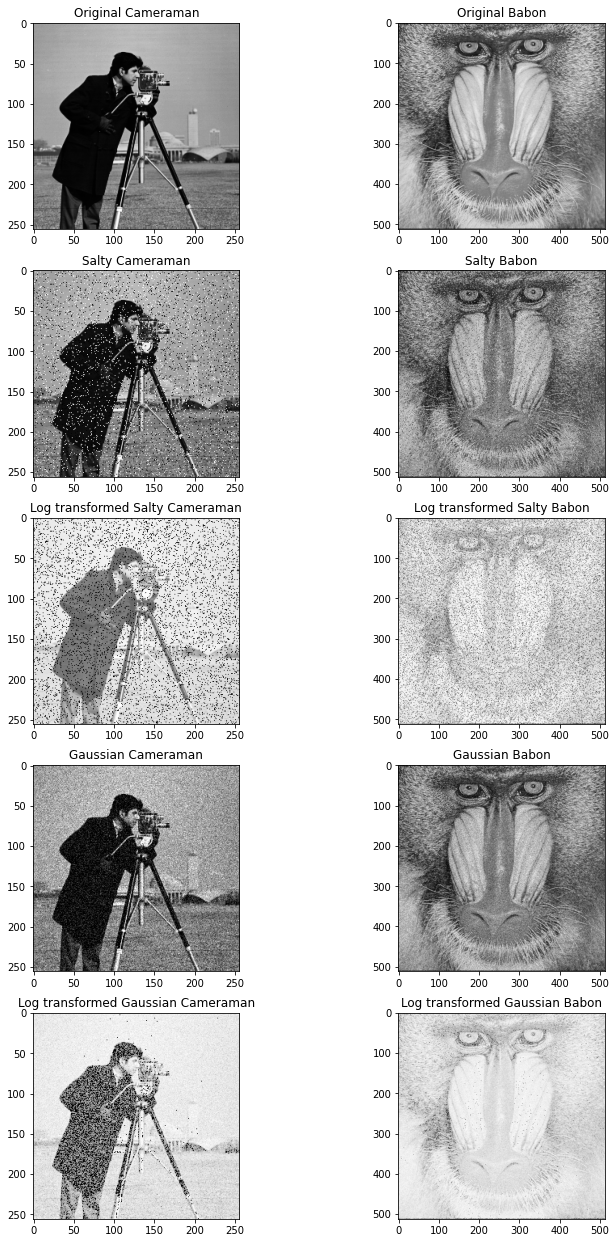

In [7]:
_, subplt = plt.subplots(5, 2, figsize=(12, 22))
subplt[0][0].imshow(camera_man, cmap='gray')
subplt[0][0].set_title("Original Cameraman")
subplt[1][0].imshow(salty_camera_man, cmap='gray')
subplt[1][0].set_title("Salty Cameraman")
subplt[2][0].imshow(log_salty_camera_man, cmap='gray')
subplt[2][0].set_title("Log transformed Salty Cameraman")
subplt[3][0].imshow(gaussian_camera_man, cmap='gray')
subplt[3][0].set_title("Gaussian Cameraman")
subplt[4][0].imshow(log_gaussian_camera_man, cmap='gray')
subplt[4][0].set_title("Log transformed Gaussian Cameraman")
subplt[0][1].imshow(babon, cmap='gray')
subplt[0][1].set_title("Original Babon")
subplt[1][1].imshow(salty_babon, cmap='gray')
subplt[1][1].set_title("Salty Babon")
subplt[2][1].imshow(log_salty_babon, cmap='gray')
subplt[2][1].set_title("Log transformed Salty Babon")
subplt[3][1].imshow(gaussian_babon, cmap='gray')
subplt[3][1].set_title("Gaussian Babon")
subplt[4][1].imshow(log_gaussian_babon, cmap='gray')
subplt[4][1].set_title("Log transformed Gaussian Babon")
plt.show()

به طور کلی تبدیل لگاریتمی تصاویر را روشن تر می کند

## Salt & pepper noise

### Creating kernels and gates for filtering

In [8]:
gate3x3 = [[1, 2, 1],
           [2, 4, 2],
           [1, 2, 1]]
g_kernel3x3 = np.array(gate3x3, dtype=np.float32) / 16
avg_kernel3x3 = np.ones((3, 3), dtype=np.float32) / 9
gate5x5 = [[1, 1, 2, 1, 1],
           [1, 2, 4, 2, 1],
           [2, 4, 8, 4, 2],
           [1, 2, 4, 2, 1],
           [1, 1, 2, 1, 1]]
g_kernel5x5 = np.array(gate5x5, dtype=np.float32) / 52
avg_kernel5x5 = np.ones((5, 5), dtype=np.float32) / 25

### Applying filters and calculate inverse transform for cameraman and showing them

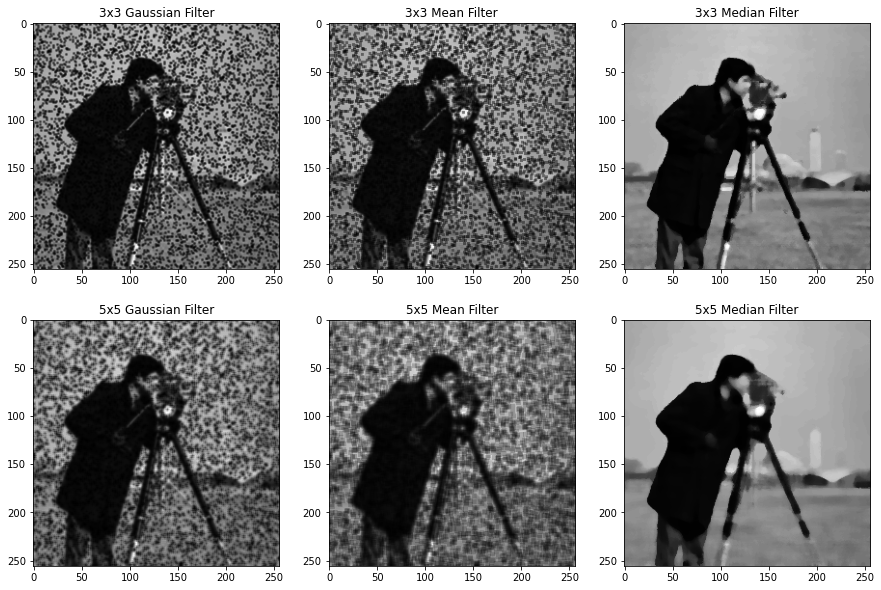

In [9]:
camera_man_gaussian3 = inverse_log_transformation(cv2.filter2D(log_salty_camera_man, -1, g_kernel3x3))
camera_man_avg3 = inverse_log_transformation(cv2.filter2D(log_salty_camera_man, -1, avg_kernel3x3))
camera_man_median3 = inverse_log_transformation(median(log_salty_camera_man, disk(3)))
camera_man_gaussian5 = inverse_log_transformation(cv2.filter2D(log_salty_camera_man, -1, g_kernel5x5))
camera_man_avg5 = inverse_log_transformation(cv2.filter2D(log_salty_camera_man, -1, avg_kernel5x5))
camera_man_median5 = inverse_log_transformation(median(log_salty_camera_man, disk(5)))

_, subplt = plt.subplots(2, 3, figsize=(15, 10))
subplt[0][0].imshow(camera_man_gaussian3, cmap='gray')
subplt[0][0].set_title("3x3 Gaussian Filter")
subplt[0][1].imshow(camera_man_avg3, cmap='gray')
subplt[0][1].set_title("3x3 Mean Filter")
subplt[0][2].imshow(camera_man_median3, cmap='gray')
subplt[0][2].set_title("3x3 Median Filter")
subplt[1][0].imshow(camera_man_gaussian5, cmap='gray')
subplt[1][0].set_title("5x5 Gaussian Filter")
subplt[1][1].imshow(camera_man_avg5, cmap='gray')
subplt[1][1].set_title("5x5 Mean Filter")
subplt[1][2].imshow(camera_man_median5, cmap='gray')
subplt[1][2].set_title("5x5 Median Filter")
plt.show()

مشاهده می شود اعمال تبدیل لاگ بر روی فیلتر های میانگین و گاوسی در نویز فلفل نمکی تاثیر منفی داشته و به نوعی باعث تشدید نویز ها شده. به نظر می رسد اعمال این تبدیل بر روی عمکرد فیلتر میانی تاثیر چندانی نداشته و این فیلتر کار خود را به خوبی انجام داده اما میزان محو شدن تصویر در مقایسه با قسمت الف همین سوال کمی بیشتر احساس می شود.

### Applying filters and calculate inverse transform for babon and showing them

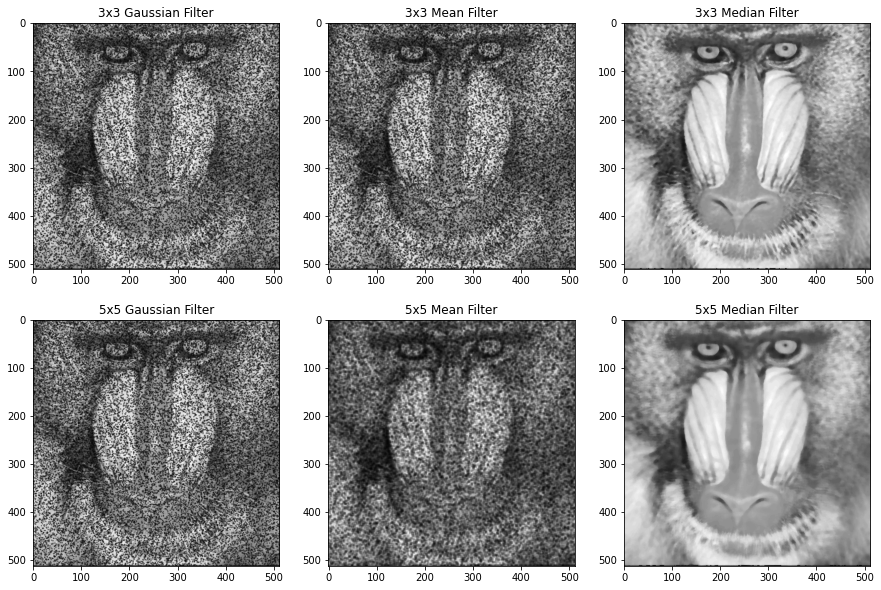

In [10]:
babon_gaussian3 = inverse_log_transformation(cv2.filter2D(log_salty_babon, -1, g_kernel3x3))
babon_avg3 = inverse_log_transformation(cv2.filter2D(log_salty_babon, -1, avg_kernel3x3))
babon_median3 = inverse_log_transformation(median(log_salty_babon, disk(3)))
babon_gaussian5 = inverse_log_transformation(cv2.filter2D(log_salty_babon, -1, g_kernel3x3))
babon_avg5 = inverse_log_transformation(cv2.filter2D(log_salty_babon, -1, avg_kernel5x5))
babon_median5 = inverse_log_transformation(median(log_salty_babon, disk(5)))

_, subplt = plt.subplots(2, 3, figsize=(15, 10))
subplt[0][0].imshow(babon_gaussian3, cmap='gray')
subplt[0][0].set_title("3x3 Gaussian Filter")
subplt[0][1].imshow(babon_avg3, cmap='gray')
subplt[0][1].set_title("3x3 Mean Filter")
subplt[0][2].imshow(babon_median3, cmap='gray')
subplt[0][2].set_title("3x3 Median Filter")
subplt[1][0].imshow(babon_gaussian5, cmap='gray')
subplt[1][0].set_title("5x5 Gaussian Filter")
subplt[1][1].imshow(babon_avg5, cmap='gray')
subplt[1][1].set_title("5x5 Mean Filter")
subplt[1][2].imshow(babon_median5, cmap='gray')
subplt[1][2].set_title("5x5 Median Filter")
plt.show()

مشابه مشاهدات تصویر مرد عکاس در این تصاویر نیز در فیلتر های گاوسی و میانگین شاید تشدید نویز ها هستیم ولی فیلتر میانی تحت تبدیل تاثیر چندانی نپذیرفته است

به طور کلی در مشاهدات در نویز فلفل نمکی حاکی از آن است که اعمال تبدیل لگاریتمی به تشدید نویز ها منجر می شود. فیلتر میانی به علت انتخاب عنصر وسط میتواند حتی با تشدید نویز کار خود را به خوبی انجام دهد اما فیلتر های گاوسی و میانگین نسبت به میزان نویز حساسیت بیشتری دارند و همین امر باعث این تفاوت چشمگیر در خروجی تصاویر می شود

## Gaussian noise

### Applying filters and calculate inverse transform for cameraman and showing them

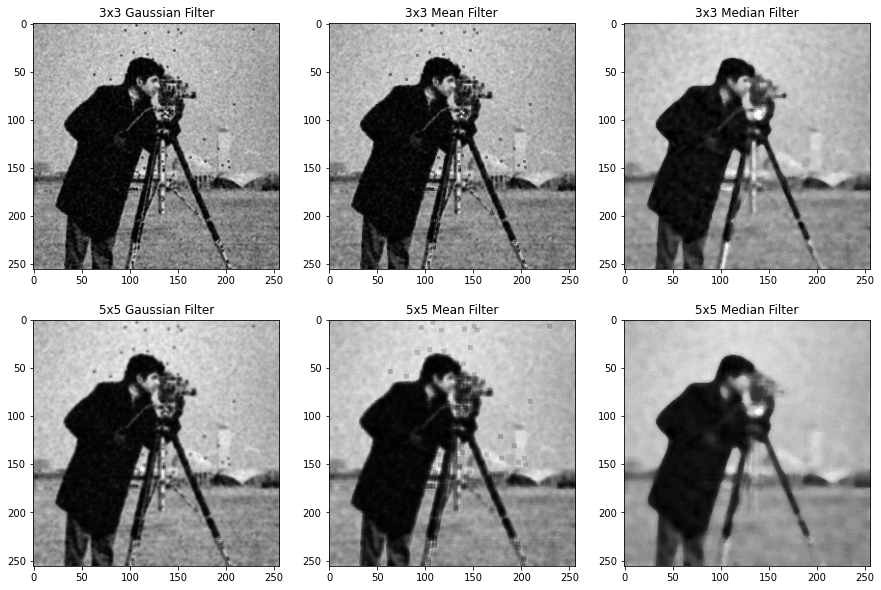

In [11]:
camera_man_gaussian3 = inverse_log_transformation(cv2.filter2D(log_gaussian_camera_man, -1, g_kernel3x3))
camera_man_avg3 = inverse_log_transformation(cv2.filter2D(log_gaussian_camera_man, -1, avg_kernel3x3))
camera_man_median3 = inverse_log_transformation(median(log_gaussian_camera_man, disk(3)))
camera_man_gaussian5 = inverse_log_transformation(cv2.filter2D(log_gaussian_camera_man, -1, g_kernel5x5))
camera_man_avg5 = inverse_log_transformation(cv2.filter2D(log_gaussian_camera_man, -1, avg_kernel5x5))
camera_man_median5 = inverse_log_transformation(median(log_gaussian_camera_man, disk(5)))

_, subplt = plt.subplots(2, 3, figsize=(15, 10))
subplt[0][0].imshow(camera_man_gaussian3, cmap='gray')
subplt[0][0].set_title("3x3 Gaussian Filter")
subplt[0][1].imshow(camera_man_avg3, cmap='gray')
subplt[0][1].set_title("3x3 Mean Filter")
subplt[0][2].imshow(camera_man_median3, cmap='gray')
subplt[0][2].set_title("3x3 Median Filter")
subplt[1][0].imshow(camera_man_gaussian5, cmap='gray')
subplt[1][0].set_title("5x5 Gaussian Filter")
subplt[1][1].imshow(camera_man_avg5, cmap='gray')
subplt[1][1].set_title("5x5 Mean Filter")
subplt[1][2].imshow(camera_man_median5, cmap='gray')
subplt[1][2].set_title("5x5 Median Filter")
plt.show()

مشاهده کردیم که نویز های با کانتراست بالا مانند نویز فلفل نمکی بعد از اعمال تبدیل تشدید می شوند در نویز گاوسی به علت کانتراست پایین تر این نویز اوضاع تصاویر بهتر می باشند اما همچنان قسمت هایی به صورت لکه روی تصویر مشاهده می شود که به علت همان تشدید ناشی از تبدیل ایجاد شده اند جزيات تیره و روشن تصویر مانند پایه دوربین نیز طی این تبدیلات دچار صدمه شده اند. در مجموع اعمال تبدیل باعث بدتر شدن عملکرد فیلتر ها می شود (در مقایسه با قسمت الف سوال)

### Applying filters and calculate inverse transform for babon and showing them

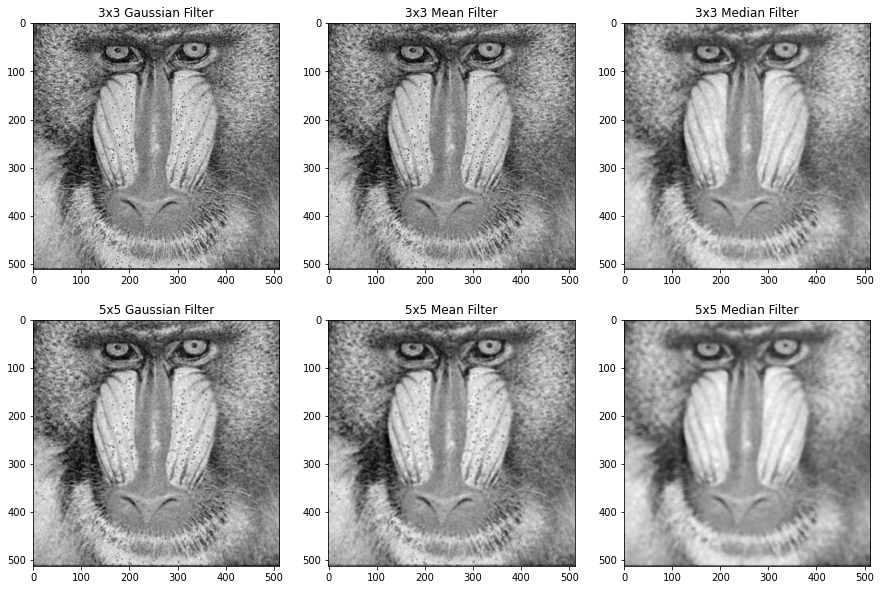

In [12]:
babon_gaussian3 = inverse_log_transformation(cv2.filter2D(log_gaussian_babon, -1, g_kernel3x3))
babon_avg3 = inverse_log_transformation(cv2.filter2D(log_gaussian_babon, -1, avg_kernel3x3))
babon_median3 = inverse_log_transformation(median(log_gaussian_babon, disk(3)))
babon_gaussian5 = inverse_log_transformation(cv2.filter2D(log_gaussian_babon, -1, g_kernel5x5))
babon_avg5 = inverse_log_transformation(cv2.filter2D(log_gaussian_babon, -1, avg_kernel5x5))
babon_median5 = inverse_log_transformation(median(log_gaussian_babon, disk(5)))

_, subplt = plt.subplots(2, 3, figsize=(15, 10))
subplt[0][0].imshow(babon_gaussian3, cmap='gray')
subplt[0][0].set_title("3x3 Gaussian Filter")
subplt[0][1].imshow(babon_avg3, cmap='gray')
subplt[0][1].set_title("3x3 Mean Filter")
subplt[0][2].imshow(babon_median3, cmap='gray')
subplt[0][2].set_title("3x3 Median Filter")
subplt[1][0].imshow(babon_gaussian5, cmap='gray')
subplt[1][0].set_title("5x5 Gaussian Filter")
subplt[1][1].imshow(babon_avg5, cmap='gray')
subplt[1][1].set_title("5x5 Mean Filter")
subplt[1][2].imshow(babon_median5, cmap='gray')
subplt[1][2].set_title("5x5 Median Filter")
plt.show()

همانند تصویر مرد عکاس، در این تصویر نیز لکه های ریزی وجود دارند که خصوصا روی پوزه حیوان نمود بیشتری دارند. علت این امر در بخش تصویر مرد عکاس توضیح داده شده در کل صدمات ناشی از اعمال تبدیل در نویز های گاوسی بسیار کمتر از نویز های فلفل نمکی بوده. اما در مجموع اعمال این تبدیل کمکی به عملکرد بهتر فیلتر ها نکرد